<a href="https://colab.research.google.com/github/sushant8525/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading the Dataset**
There is a total of **7787** movies / TV shows in this data set collected from **AlmaBetter**

Each row contains the following information: **type** (Movie or TV Show), **title, director, cast, country, rating** (ex. PG, PG-13, R, etc.), **listed_in** (genre), and **plot description**.

#Mount the drive and import the datset#


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
netflix = pd.read_csv('/content/drive/MyDrive/capstone project 4 ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

##top head five rows##

In [5]:
# Viewing the data of top 5 rows to take a glimps of the data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##bottom head five rows##

In [6]:
# View the data of bottom 5 rows to take a glimps of the data
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#check details about the data set
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#Looking for the description of the dataset to get insights of the data
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
#Getting the shape of dataset with rows and columns
netflix.shape

(7787, 12)

In [10]:
#Getting all the columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#*Preprocessing the dataset*#


##Missing values##


In [11]:
#check for count of missing values in each column.
netflix.isnull().sum()
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

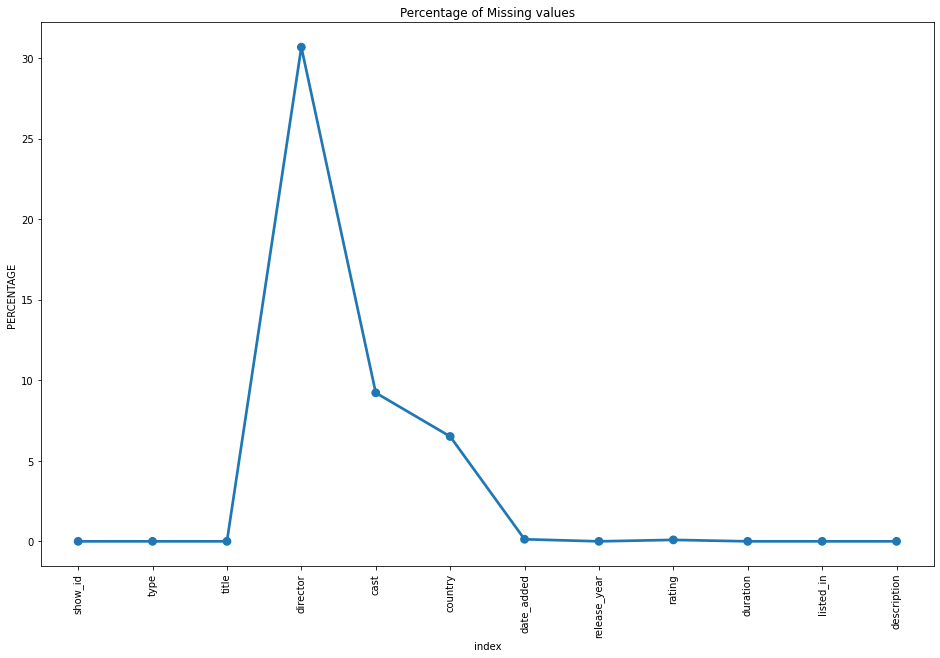

In [12]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((netflix.isnull().sum())*100/netflix.shape[0]).reset_index()
plt.figure(figsize=(16,10))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

'''dfdgdgdgdg'''gd

###Duplicate values###


In [13]:
# Checking Duplicate Values
value=len(netflix[netflix.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


 

*   In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.


## drop columns which are not required##

In [14]:
netflix_1=netflix.drop(['show_id','date_added','release_year','duration'], axis=1)
netflix_df = netflix_1.copy()
netflix_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


# **Natural Language Processing (NLP) Model**

For the NLP portion of this project, I will first convert all plot descriptions to word vectors so they can be processed by the NLP model. Then, the similarity between all word vectors will be calculated using cosine similarity (measures the angle between two vectors, resulting in a score between -1 and 1, corresponding to complete oppositses or perfectly similar vectors). Finally, I will extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [15]:
!pip install matplotlib-venn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import spacy.cli
spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [17]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [18]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [19]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [20]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [21]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean 

In [22]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [23]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

# **Test NLP Model**
To test my NLP model, I will look at the most similar plot descriptions to one of my favourite movies, Catch Me If You Can, directed by Steven Spielberg and starring Leonardo DiCaprio and Tom Hanks.

In [ ]:
test_index = netflix.index[netflix.title == "Catch Me If You Can"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

As you can see, my NLP model detected a lot of similar key words like 'FBI' from the descriptions. The descriptions also appear to be semantically related as they all appear to be related to crime.


# **K-Means Clustering Model**
Prior to creating the k-means clustering model, I will perform the following data cleaning and feature engineering tasks:

* Fill missing values with most common 
entry for the column (ex. fill missing country entries as 'United States').
* Convert columns with multiple values in a cell to a list and only take the first value (ex. take only the lead actor or actress from each cast list).
* Encode all categorical variables.

# **DATA CLEANING**


In [ ]:
# Fill missing country entries with United States
netflix_df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
netflix_df.director = netflix_df.director.str.split(', ').tolist()
netflix_df.cast = netflix_df.cast.str.split(', ').tolist()
netflix_df.country = netflix_df.country.str.split(', ').tolist()
netflix_df.listed_in = netflix_df.listed_in.str.split(', ').tolist()